# Netflix Movies and TV Shows

- type;

- title;

- director; 

- cast;

- country;

- date_added;

- release_year;

- rating;

- duration;

- listed_in;

- description. 

Os nomes das colunas são autoexplicativos

In [1]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('netflix_titles.csv')

In [3]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
# Excluindo a coluna "show_id":
del data['show_id']

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          7787 non-null   object
 1   title         7787 non-null   object
 2   director      5398 non-null   object
 3   cast          7069 non-null   object
 4   country       7280 non-null   object
 5   date_added    7777 non-null   object
 6   release_year  7787 non-null   int64 
 7   rating        7780 non-null   object
 8   duration      7787 non-null   object
 9   listed_in     7787 non-null   object
 10  description   7787 non-null   object
dtypes: int64(1), object(10)
memory usage: 669.3+ KB


# Quais são os tipos de obras e a Quantidade de cada? 
- Tipos de obras listadas e a quantidade de cada

    Obs.: Dentro dos tipos há a listagem de gênero, por isso a presença da coluna 'listed_in', e nessas vão desde comédia, drama e documentários até terror, suspense e aventura.

In [6]:
data['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

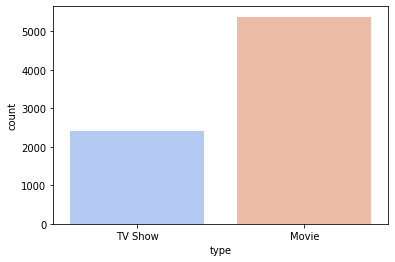

In [7]:
sns.countplot(x='type', data=data, palette='coolwarm');

O nome do própio dataset indicado no Kaggle é "Netflix Movies and TV Shows", é claro que seria apenas dois tipos, porém agora temos a contagem de cada.

# Quantidade de Filmes e TV Shows produzidos por ano:

In [8]:
data['release_year'].value_counts().sort_index()

1925       1
1942       2
1943       3
1944       3
1945       3
        ... 
2017    1012
2018    1121
2019     996
2020     868
2021      31
Name: release_year, Length: 73, dtype: int64

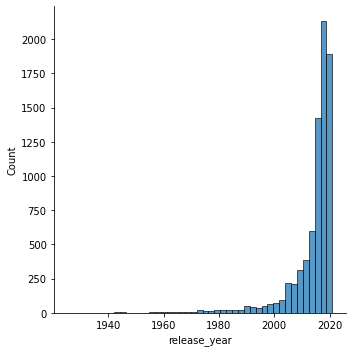

In [9]:
sns.displot(data['release_year'], bins=45);

É fácil ver o aumento de obras realisadas com o passar do tempo, devido ao grande aumentado da industria do entretenimento.

# Filmes e séries produzidas apenas no Brasil:

- Algumas produções não são realizadas totalmente no Brasil, podemos ver o exemplo do longa Cidade de Deus (City  of God)

In [10]:
# Cinco produções totalmente Brasileiras: 
data[data['country']=='Brazil'].head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
208,Movie,A new Capitalism,NaN,NaN,Brazil,"June 12, 2018",2017,TV-14,76 min,"Documentaries, International Movies",Entrepreneurs worldwide explore alternatives t...
218,TV Show,A Queen Is Born,Carla Barros,"Gloria Groove, Alexia Twister",Brazil,"November 11, 2020",2020,TV-14,1 Season,"International TV Shows, Reality TV",Gloria Groove and Alexia Twister make drag dre...
320,Movie,Afonso Padilha: Classless,"Junior Carelli, Rudge Campos",Afonso Padilha,Brazil,"September 3, 2020",2020,TV-MA,63 min,Stand-Up Comedy,Brazilian comedian Afonso Padilha dives into h...
322,TV Show,Afronta! Facing It!,Juliana Vicente,"Loo Nascimento, Ingrid Silva, Rincon Sapiência...",Brazil,"October 31, 2020",2017,TV-PG,1 Season,"Docuseries, International TV Shows",This docuseries spotlights Afro-Brazilian thin...


In [11]:
data[(data['country']=='Brazil') & (data['title']=='City of God')]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


Como observado, não há nenhum 'City of God' produzido apenas no Brasil, porém se puxarmos apenas o título da obra, será possível observar os países em que o mesmo foi produzido: 

In [12]:
data[data['title']=='City of God']

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1400,Movie,City of God,"Fernando Meirelles, Katia Lund","Alexandre Rodrigues, Leandro Firmino, Phellipe...","Brazil, France, Germany","January 1, 2020",2002,R,130 min,"Dramas, Independent Movies, International Movies","Growing up in a Rio de Janeiro slum, Rocket is..."


Sabemos que as filmagens foram realizadas no Brasil, porém o restante da produção foi realizada na França e Alemanhã.

# Ranking dos 10 países que mais produzem

In [13]:
data['country'].value_counts()

United States                                                         2555
India                                                                  923
United Kingdom                                                         397
Japan                                                                  226
South Korea                                                            183
                                                                      ... 
United States, Canada, Japan, Panama                                     1
Netherlands, Germany, Italy, Canada                                      1
Jordan                                                                   1
Spain, Belgium                                                           1
United States, Canada, Indonesia, United Kingdom, China, Singapore       1
Name: country, Length: 681, dtype: int64

# Listados
Podemos observar que cada obra está listado em uma categoria, como indicado na coluna "listed_in".

- Segue abaixo a quantidade de séries e filmes de acordo listados por categorias:

In [14]:
# Quantidade de alguns filmes por categoria:
n_lgbtq_m = data.listed_in.map(lambda listed: 'LGBTQ Movies' in listed).sum()
n_comedies_m = data.listed_in.map(lambda listed: 'Comedies' in listed).sum()
n_dramas_m = data.listed_in.map(lambda listed: 'Dramas' in listed).sum()
n_documentaries = data.listed_in.map(lambda listed: 'Documentaries' in listed).sum() 
n_ind_m = data.listed_in.map(lambda listed: 'Independent Movies' in listed).sum()
n_int_m = data.listed_in.map(lambda listed: 'International Movies' in listed).sum()

# Quantidade de algumas séries por categoria:
n_doc_s = data.listed_in.map(lambda listed: 'Docuseries' in listed).sum()
n_drama_s = data.listed_in.map(lambda listed: 'TV Dramas' in listed).sum()
n_inter_s = data.listed_in.map(lambda listed: 'International TV Shows' in listed).sum()
n_reality_s = data.listed_in.map(lambda listed: 'Reality TV' in listed).sum()
n_anime_s = data.listed_in.map(lambda listed: 'Anime Series' in listed).sum()
n_mysteries_s = data.listed_in.map(lambda listed: 'TV Mysteries' in listed).sum()


desc_count = pd.Series([n_lgbtq_m, n_comedies_m, n_dramas_m, n_documentaries, n_ind_m, n_int_m, n_doc_s, n_drama_s
                       , n_inter_s, n_reality_s, n_anime_s, n_mysteries_s], 
                       index=['Filmes LGBTQ', 'Filmes Comédia',
                              'Filmes Drama', 'Filmes Documentários', 'Filmes Independentes', 'Filmes Internacionais',
                              'Séries Documentadas', 'TV Shows Dramáticos', 'TV Shows Internacionais',
                             'Reality Shows', 'Séries de Anime', 'TV Show Misterioso'], 
                       name='QUANTIDADE DE FILMES E TV SHOWS POR CATEGORIA')
desc_count

Filmes LGBTQ                 90
Filmes Comédia             1996
Filmes Drama               2810
Filmes Documentários        786
Filmes Independentes        673
Filmes Internacionais      2437
Séries Documentadas         353
TV Shows Dramáticos         704
TV Shows Internacionais    1199
Reality Shows               222
Séries de Anime             148
TV Show Misterioso           90
Name: QUANTIDADE DE FILMES E TV SHOWS POR CATEGORIA, dtype: int64

# Encontrando palavras na descrição ("description"):

In [15]:
war = data.description.map(lambda desc: 'war' in desc).sum()
crime = data.description.map(lambda desc: 'crime' in desc).sum()
braza = data.description.map(lambda desc: 'Brazilian' in desc).sum()
dead = data.description.map(lambda desc: 'dead' in desc).sum()

desc = pd.Series([war, crime, braza, dead], index=['"war"', '"crime"',
                                                   '"Brazilian"', '"dead"'],
                name = 'QUANTIDADE DE PALAVRAS NA DESCRIÇÃO')
desc

"war"          356
"crime"        191
"Brazilian"     16
"dead"         118
Name: QUANTIDADE DE PALAVRAS NA DESCRIÇÃO, dtype: int64

Aglumas informações foram retiradas do Dataset neste Notebook. 

O conteúdo do Dataset é bastante denso, tendo em vista que praticamente todo o catálogo está contido nele, sendo então uma boa fonte para visualizar e tratar dados. O catálogo sofre modificações quase que rotineiramente, portanto é preciso levar em conta a desatualização do Dataset utilizado. 

Os simples passos acima são apenas alguns de muitos para dar início a uma análise mais completa. 